In [1]:
# Install and load packages
library(ggplot2)
install.packages("gridExtra", repos="http://cran.rstudio.com/")
library(gridExtra)
library(scales)


The downloaded source packages are in
	‘/private/var/folders/v9/6_3q92b512q408c7y9_mw55h0000gn/T/RtmpmwPG72/downloaded_packages’


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


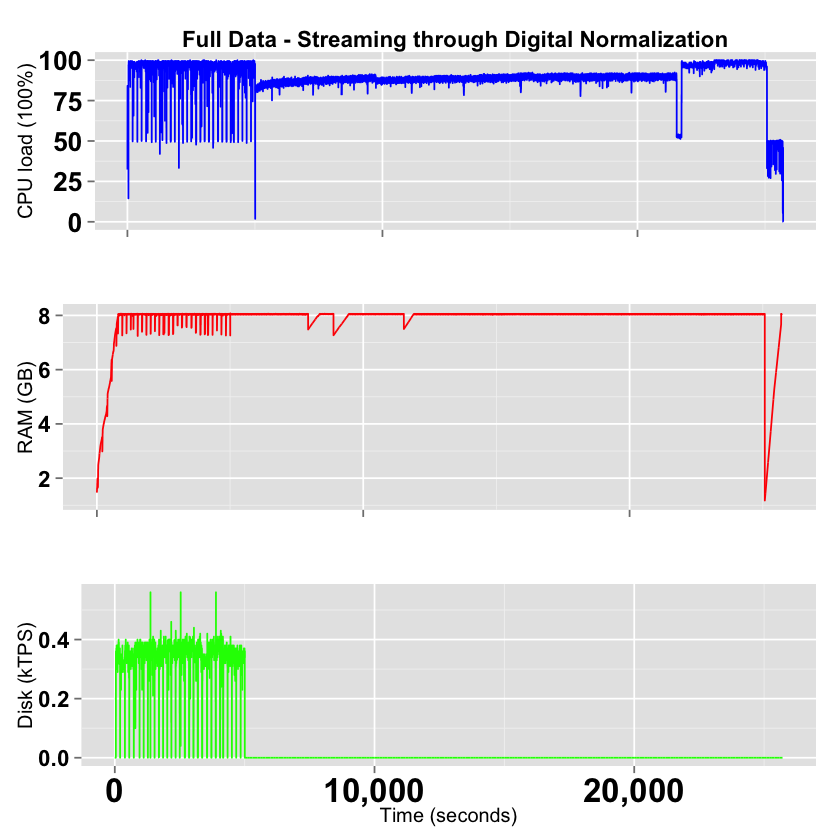

In [2]:
## EEL POND LOG.OUT TO ANNOTATED GRAPH
# Ran on ec2 m4.large, 600 GB added disk

log.data <- read.table("~/git/ep-streaming/output/streaming/2016-06-08-full-thru-diginorm/log.out")
colnames(log.data) <- c("TIME", "CPU","RAM","DISK","5","6","7","8")

# Divide RAM column by 1e6 to get from bytes to MB, DISK by 1e2

log.data$RAM <- log.data$RAM/1e6
log.data$DISK <- log.data$DISK/1e2

# Plot each graph (cpu, ram, disk) separately, 
# then use grid.arrange to stack
# ndg = nonstreaming, through diginorm (is on full dataset)

cpuplots <- ggplot(data=log.data, aes_string(x="TIME", y="CPU")) + 
  geom_line(color = "blue") + xlab("") + ylab("CPU load (100%)") +
  ggtitle("Full Data - Streaming through Digital Normalization") + theme(axis.text.x = 
  element_blank(), axis.text.y = element_text(size = 16, color = "black", 
  face = "bold"), plot.title = element_text(face = "bold", size = 13.5))

ramplots <- ggplot(data=log.data, aes_string(x="TIME", y="RAM")) + 
  geom_line(color = "red") + xlab("") + ylab("RAM (GB)") +
  theme(axis.text.x = element_blank(), axis.text.y = element_text(
    size = 13.5, color = "black", face = "bold"))

diskplots <- ggplot(data=log.data, aes_string(x="TIME", y="DISK")) + 
  geom_line(color = "green") + xlab("Time (seconds)") + ylab("Disk (kTPS)") +
  theme(axis.text.x = element_text(size = 20, color = "black", 
  face = "bold"), axis.text.y = element_text(size = 13.5, 
  color = "black", face = "bold")) + scale_x_continuous(labels = comma)

grid.arrange(cpuplots,ramplots,diskplots)